# Introduction
- このカーネルでは、カーネル`Angles and Distaces`から得られた特徴量のEDAを行う
- 上記のカーネルで得られた特徴量は、dat_for_eda/structures_detail.csv にある

# Import everyting I need :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from plotly.graph_objs import Scatter3d
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Data Preparation

In [4]:
path = './input/champs-scalar-coupling/structures.csv'
df_struct = pd.read_csv(path)

path = './input/champs-scalar-coupling/train.csv'
df_train = pd.read_csv(path)

path = './data_for_eda/structure_detail.csv'
df_struct_dtl = pd.read_csv(path)

# Visuallizaion

## Do It!!

----
- df_struct_dtl 内には、一つの分子(`dsgdb9nsd_000001`)しかないのでそれを選択

In [11]:
molecule_name = 'dsgdb9nsd_000001'
select_idx = df_struct['molecule_name'] == molecule_name
df_struct_select = df_struct[select_idx]

pos_list = df_struct_select[['x', 'y', 'z']].values
atom_list = df_struct_select['atom'].values

df_struct_select

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [24]:
# select atom_index (look above a table.)
# ----- set params -----
check_atom_idx = 1
# ----------------------

mole = molecule_name
df_t = df_train[df_train['molecule_name']==mole]
df_s = df_struct[df_struct['molecule_name']==mole]

interaction_atom_index_0  = df_t['atom_index_1'][df_t['atom_index_0'] == check_atom_idx].values
interaction_atom_index_1  = df_t['atom_index_0'][df_t['atom_index_1'] == check_atom_idx].values
interaction_type0         = df_t['type'][df_t['atom_index_0'] == check_atom_idx].values
interaction_type1         = df_t['type'][df_t['atom_index_1'] == check_atom_idx].values
interaction_type          = list(interaction_type0) + list(interaction_type1)
scalar_coupling_constant0 = df_t['scalar_coupling_constant'][df_t['atom_index_0'] == check_atom_idx].values
scalar_coupling_constant1 = df_t['scalar_coupling_constant'][df_t['atom_index_1'] == check_atom_idx].values
scalar_coupling_constant  = np.hstack((scalar_coupling_constant0, scalar_coupling_constant1))

interaction_list = np.hstack([interaction_atom_index_0, interaction_atom_index_1])
print(f'interaction atoms to atom_index({check_atom_idx}): {interaction_list}')
print(interaction_type)

df_t

interaction atoms to atom_index(1): [0 2 3 4]
['1JHC', '2JHH', '2JHH', '2JHH']


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095


**show coupling !!**

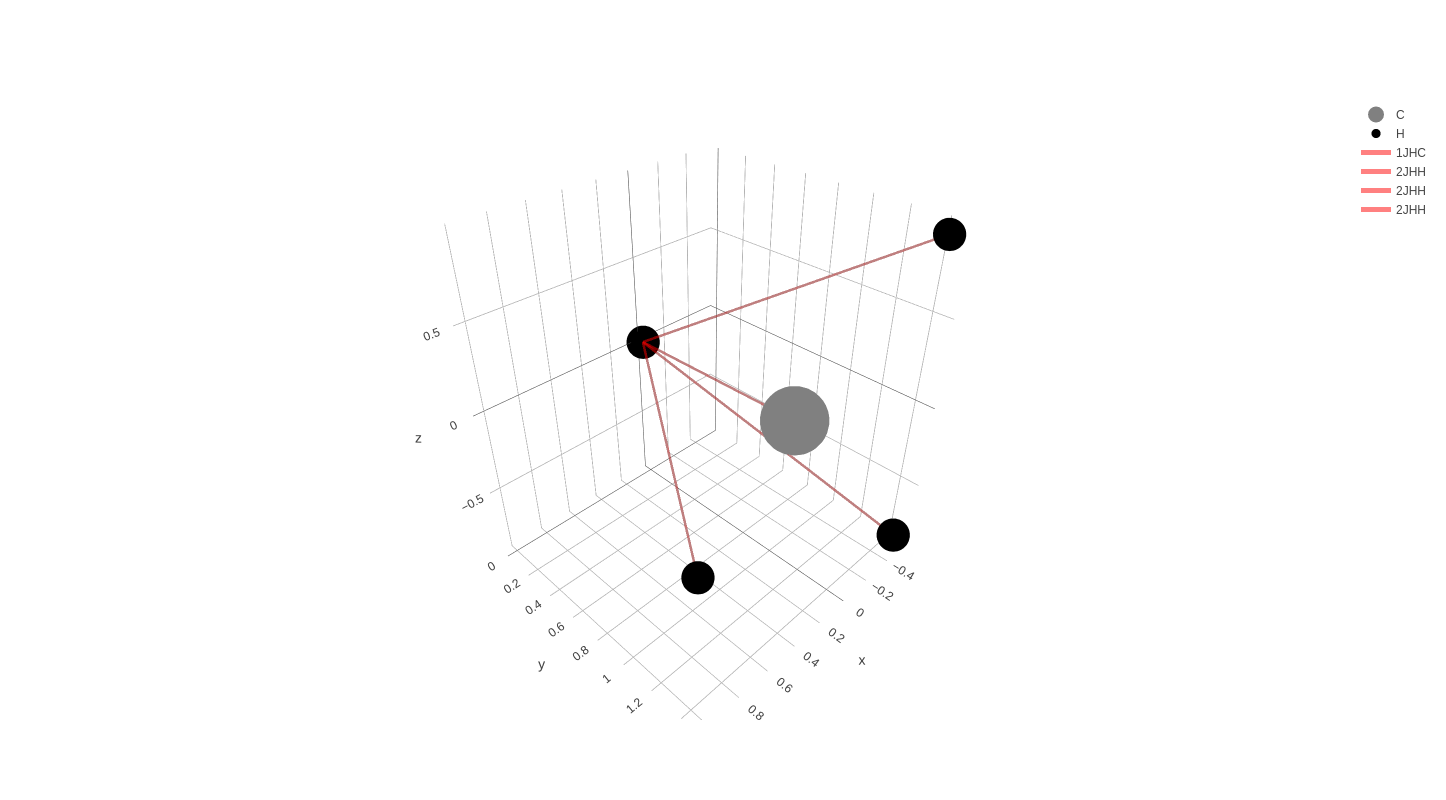

In [25]:
# ----- set params -----
scale = 25
# ----------------------

atoms_in_molecule = df_struct_select['atom'].unique()
atom_list =  ['C', 'N', 'O', 'H', 'F']
atom_size =  [0.77, 0.75, 0.73, 0.37, 0.71]
color_list = ['gray', 'red', 'blue', 'black', 'green']

# atoms plot
scatter_list = []
for i, atom in enumerate(atom_list):
    atom_idx = df_struct_select['atom'] == atom
    pos = pos_list[atom_idx]
    scatter = Scatter3d(x=pos[:, 0], y=pos[:, 1], z=pos[:, 2], mode='markers',
                        opacity=1,
                        name=atom,
                        marker=dict(size=atom_size[i]*scale,                
                                    color=color_list[i],              
                                   ),
                        text = df_struct_select['atom_index'][atom_idx],
                        hoverinfo='text'
                       )
    
    scatter_list.append(scatter)

# interaction pares plot
pos_check = pos_list[check_atom_idx]
x_check = pos_check[0]
y_check = pos_check[1]
z_check = pos_check[2]
lines_list = []
for i, idx_interact in enumerate(interaction_list):
    pos_interaction = pos_list[idx_interact]
    x_interaction = pos_interaction[0]
    y_interaction = pos_interaction[1]
    z_interaction = pos_interaction[2]
    
    lines = Scatter3d(x=[x_check, x_interaction], y=[y_check, y_interaction], z=[z_check, z_interaction],
                      mode='lines', 
                      opacity=0.5, 
                      name=interaction_type[i],
                      hovertext=f'scalar coupling constant: {scalar_coupling_constant[i]}',
                      line = dict(color='red',
                                  width=5)
                     )
    lines_list.append(lines)

# show
layout = go.Layout(height=800, width=1200)  
fig = go.Figure(data=scatter_list + lines_list, layout=layout)
iplot(fig)

In [17]:
df_struct_dtl

,atom_index_0,atom_index_1,bond_atom,bond_distance,molecule_name,scalar_coupling_constant,tertiary_angle_0,tertiary_angle_1,tertiary_angle_2,tertiary_atom_0,tertiary_atom_1,tertiary_atom_2,tertiary_distance_0,tertiary_distance_1,tertiary_distance_2,totalatoms,type
0,1,0,C3,1.091953,dsgdb9nsd_000001,84.8076,1.910584,1.910635,1.910648,H,H,H,1.783120,1.783147,1.783157,5,1JHC
1,1,2,H,1.783120,dsgdb9nsd_000001,-11.2570,0.615505,1.047203,1.047212,C3,H,H,1.091953,1.783147,1.783157,5,2JHH
2,1,3,H,1.783147,dsgdb9nsd_000001,-11.2548,0.615481,1.047176,1.047203,C3,H,H,1.091953,1.783120,1.783157,5,2JHH
3,1,4,H,1.783157,dsgdb9nsd_000001,-11.2543,0.615474,1.047176,1.047194,C3,H,H,1.091953,1.783120,1.783147,5,2JHH
4,2,0,C3,1.091952,dsgdb9nsd_000001,84.8074,1.910584,1.910637,1.910653,H,H,H,1.783120,1.783148,1.783158,5,1JHC
5,2,3,H,1.783158,dsgdb9nsd_000001,-11.2541,0.615472,1.047176,1.047195,C3,H,H,1.091952,1.783120,1.783148,5,2JHH
6,2,4,H,1.783148,dsgdb9nsd_000001,-11.2548,0.615479,1.047176,1.047204,C3,H,H,1.091952,1.783120,1.783158,5,2JHH
7,3,0,C3,1.091946,dsgdb9nsd_000001,84.8093,1.910635,1.910643,1.910653,H,H,H,1.783147,1.783148,1.783158,5,1JHC
8,3,4,H,1.783148,dsgdb9nsd_000001,-11.2543,0.615475,1.047194,1.047204,C3,H,H,1.091946,1.783147,1.783158,5,2JHH
9,4,0,C3,1.091948,dsgdb9nsd_000001,84.8095,1.910643,1.910637,1.910648,H,H,H,1.783148,1.783148,1.783157,5,1JHC


---> teritary_atom_0,1,2がよくわからん。  
---> teritary_angleはオイラー角?
